## Cell segmentation + Voronoi labeling
In some image segmentation projects, threshold-based segmentation works ok-ish and post-processing label images using [Voronoi-Tesselation](https://en.wikipedia.org/wiki/Voronoi_diagram) can help improving the segmentation result. We demonstrate the procedure on an image showing cell-membranes. The procedure is shown in 2D but technically also works in 3D.

In [1]:
from skimage.data import cells3d
import pyclesperanto as cle

We start with an image showing cell membranes from the [scikit-image examples](https://scikit-image.org/docs/stable/auto_examples/data/plot_3d.html#sphx-glr-auto-examples-data-plot-3d-py).

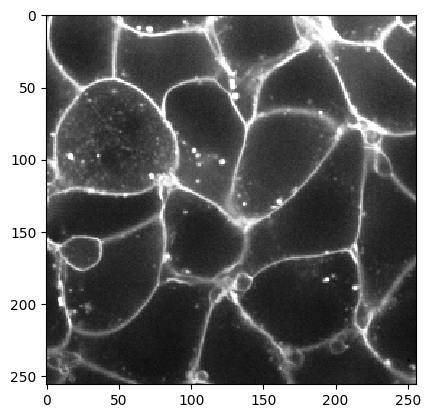

In [2]:
membranes = cells3d()[30, 0]

cle.imshow(membranes, min_display_intensity=0, max_display_intensity=10000)

The background in this image is a bit uneven and thus, we subtract a Gaussian-blurred version of this image from itself. The approach is also known as [Difference_of_Gaussian (DoG)](https://en.wikipedia.org/wiki/Difference_of_Gaussians).

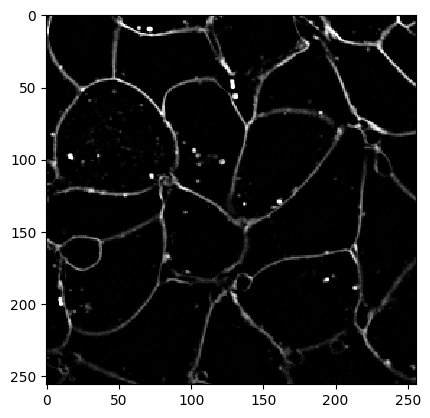

In [3]:
background_subtracted = cle.difference_of_gaussian(membranes, sigma2_x=5, sigma2_y=5)

cle.imshow(background_subtracted, min_display_intensity=0, max_display_intensity=10000)

Next, we segment the membranes using a constant threshold. Note: manual choosing thresholds is not the optimal way of doing this as it is subjective. We just use this method here for demonstration purposes.

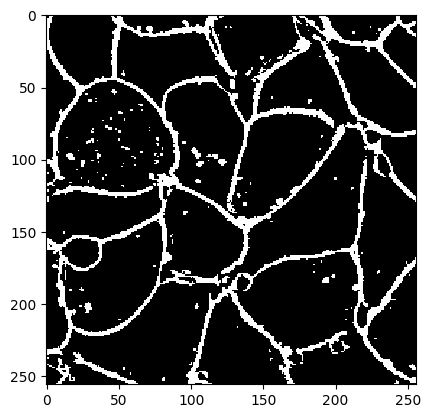

In [4]:
binary = cle.greater_or_equal_constant(background_subtracted, scalar=500)

cle.imshow(binary)

Binary images can be post-processed using binary [erosion and dilation](https://en.wikipedia.org/wiki/Erosion_(morphology)).

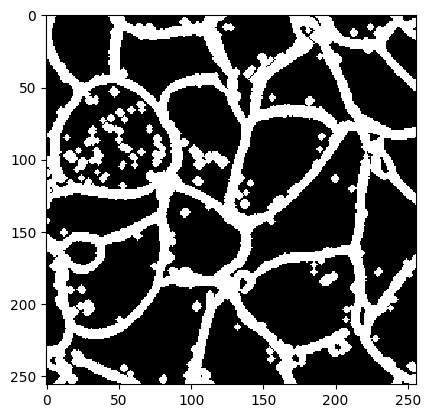

In [5]:
dilated = cle.dilate_sphere(cle.dilate_sphere(binary))

cle.imshow(dilated)

Next, we invert the image so that cells are white (pixel value 1) and membranes receive pixel value 0.

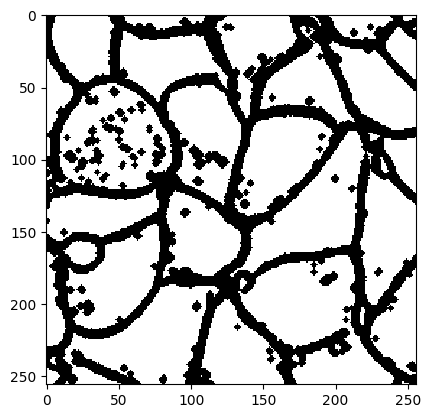

In [6]:
binary_inverted = cle.binary_not(dilated)

cle.imshow(binary_inverted)

In such a binary image individual cells can be labeled with different pixel values using [connected component labeling](https://en.wikipedia.org/wiki/Connected-component_labeling).

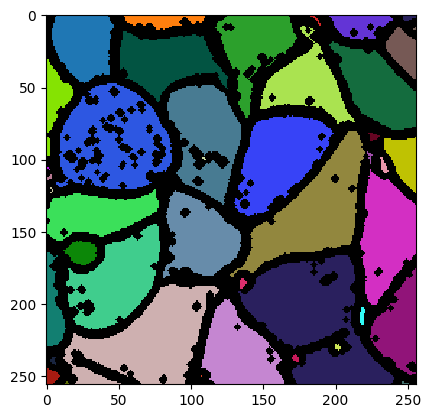

In [7]:
rough_labels = cle.connected_components_labeling_box(binary_inverted)

cle.imshow(rough_labels, labels=True)

To close the gaps within and between cells, we use the Voronoi-Tesselation approach.

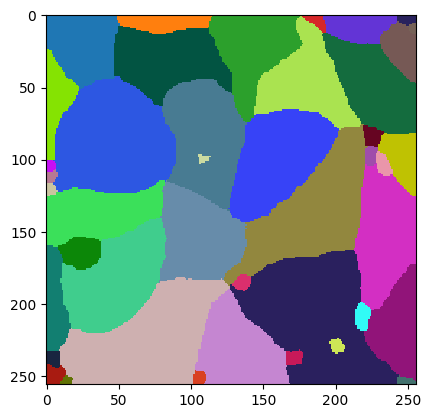

In [8]:
labels = cle.extend_labeling_via_voronoi(rough_labels)
cle.imshow(labels, labels=True)